# Configure Speed of Learning with Learning Rate

The weights of a neural network cannot be calculated using an analytical method. Instead, the weights must be discovered via an empirical optimization procedure called stochastic gradient descent. The optimization problem addressed by stochastic gradient descent for neural networks is challenging, and the space of solutions (sets of weights) may be comprised of many good solutions (called global optima) as well as easy to find, but low in skill solutions (called local optima). The amount of change to the model during each step of this search process, or the step size, is called the learning rate and provides perhaps the most important hyperparameter to tune for your neural network to achieve good performance on your problem. In this tutorial, you will discover the learning rate hyperparameter used when training deep learning neural networks. After completing this tutorial, you will know:
* Learning rate controls how quickly or slowly a neural network model learns a problem.
* How to configure the learning rate with sensible defaults, diagnose behavior, and develop a sensitivity analysis.
* How to further improve performance with learning rate schedules, momentum, and adaptive learning rates.

## Learning Rate

In this section, you will discover the learning rate, its effect on the model during training, and tips on how to configure the learning rate when training your neural network models.

### What Is the Learning Rate?

Deep learning neural networks are trained using the stochastic gradient descent algorithm. Stochastic gradient descent is an optimization algorithm that estimates the error gradient for the model's current state using examples from the training dataset, then updates the model's weights using the backpropagation of errors algorithm, referred to as simply backpropagation. The amount that the weights are updated during training is referred to as the step size or the learning rate. Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0.

The learning rate is often represented using the notation of the lowercase Greek letter eta ($ \eta $). During training, the backpropagation of error estimates the amount of error for each weight node in the network. Instead of updating the weight with the full amount, it is scaled by the learning rate. This means that a learning rate of 0.1, a traditionally common default value, would mean that weights in the network are updated 0.1 x (estimated weight error) or 10% of the estimated weight error each time the weights are updated.

### Effect of Learning Rate

A neural network learns or approximates a function to best map inputs to outputs from examples in the training dataset. The learning rate hyperparameter controls the rate or speed at which the model learns. Specifically, it controls the amount of apportioned error that the model weights are updated with each time they are updated, such as at the end of each batch of training examples. Given a perfectly configured learning rate, the model will learn to best approximate the function given available resources (the number of layers and the number of nodes per layer) in a given number of training epochs (passes through the training data).

Generally, a large learning rate allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights. A smaller learning rate may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train. At extremes, a learning rate that is too large will result in weight updates that will be too large, and the performance of the model (such as its loss on the training dataset) will oscillate over training epochs. Oscillating performance is said to be caused by weights that diverge (are divergent). A learning rate that is too small may never converge or may get stuck on a suboptimal solution.

In the worst case, weight updates that are too large may cause the weights to explode (i.e., result in a numerical overflow).

Therefore, we should not use a learning rate that is too large or too small. Nevertheless, we must configure the model in such a way that, on average, a good enough set of weights is found to approximate the mapping problem as represented by the training dataset.

### How to Configure Learning Rate

It is important to find a good value for the learning rate for your model on your training dataset. The learning rate may be the most important hyperparameter to configure for your model. 

If there are resources to tune hyperparameters, much of this time should be dedicated to tuning the learning rate.

Unfortunately, we cannot analytically calculate the optimal learning rate for a given model on a given dataset. Instead, a good (or good enough) learning rate must be discovered via trial and error.

The range of values to consider for the learning rate is less than 1.0 and greater than 10<sup>-6</sup>.

The learning rate will interact with many other aspects of the optimization process, and the interactions may be nonlinear. Nevertheless, in general, smaller learning rates will require more training epochs. Conversely, larger learning rates will require fewer training epochs. Further, smaller batch sizes are better suited to smaller learning rates given the noisy estimate of the error gradient. A traditional default value for the learning rate is 0.1 or 0.01, and this may represent a good starting point on your problem.

Diagnostic plots can be used to investigate how the learning rate impacts the rate of learning and learning dynamics of the model. One example is to create a line plot of loss over training epochs during training. The line plot can show many properties, such as:
* The rate of learning over training epochs, such as fast or slow.
* Whether the model has learned too quickly (sharp rise and plateau) or is learning too slowly (little or no change).
* Whether the learning rate might be too large via oscillations in the loss.

Configuring the learning rate is challenging and time-consuming.

An alternative approach is to perform a sensitivity analysis of the learning rate for the chosen model, also called a grid search. This can help to highlight an order of magnitude where good learning rates may reside and describe the relationship between learning rate and performance. It is common to grid search learning rates on a log scale from 0.1 to 10<sup>-5</sup> or 10<sup>-6</sup>.

When plotted, the results of such a sensitivity analysis often show a U shape, where loss decreases (performance improves) as the learning rate is decreased with a fixed number of training epochs to a point where loss sharply increases again because the model fails to converge.

### Add Momentum to the Learning Process

Training a neural network can be made easier with the addition of history to the weight update. Specifically, an exponentially weighted average of the prior updates to the weight can be included when the weights are updated. This change to stochastic gradient descent is called momentum and adds inertia to the update procedure, causing many past updates in one direction to continue in that direction in the future.

Momentum can accelerate learning on those problems where the high-dimensional weight space that is being navigated by the optimization process has structures that mislead the gradient descent algorithm, such as flat regions or steep curvature.

The amount of inertia of past updates is controlled via the addition of a new hyperparameter, often referred to as the momentum or velocity, and uses the notation of the Greek lowercase letter alpha ($ \alpha $).

It has the effect of smoothing the optimization process, slowing updates to continue in the previous direction instead of getting stuck or oscillating.

Momentum is set to a value greater than 0.0 and less than one, where common values such as 0.9 and 0.99 are used in practice.

Momentum does not make it easier to configure the learning rate, as the step size is independent of the momentum. Instead, momentum can improve the speed of the optimization process in concert with the step size, improving the likelihood that a better set of weights is discovered in fewer training epochs.

### Use a Learning Rate Schedule

An alternative to using a fixed learning rate is to instead vary the learning rate over the training process. How the learning rate changes over time (training epochs) is referred to as the learning rate schedule or learning rate decay. Perhaps the simplest learning rate schedule is to decrease the learning rate linearly from a large initial value to a small value. This allows large weight changes at the beginning of the learning process and small changes or fine-tuning towards the end of the learning process.

In fact, using a learning rate schedule may be a best practice when training neural networks. Instead of choosing a fixed learning rate hyperparameter, the configuration challenge involves choosing the initial learning rate and a learning rate schedule. It is possible that the choice of
the initial learning rate is less sensitive than choosing a fixed learning rate, given the better performance that a learning rate schedule may permit. The learning rate can be decayed to a small value close to zero. Alternately, the learning rate can be decayed over a fixed number of training epochs, then kept constant at a small value for the remaining training epochs to facilitate more time fine-tuning.

### Adaptive Learning Rates

The learning algorithm can monitor the model's performance on the training dataset, and the learning rate can be adjusted in response. This is called an adaptive learning rate. Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

Alternately, the learning rate can be increased again if performance does not improve for a fixed number of training epochs. An adaptive learning rate method will generally outperform a model with a poorly configured learning rate.

Although no single method works best on all problems, there are three adaptive learning rate methods that have proven to be robust over many types of neural network architectures and problem types. They are AdaGrad, RMSProp, and Adam, and all maintain and adapt learning rates for each of the weights in the model. Perhaps the most popular is Adam, as it builds upon RMSProp and adds momentum.

A robust strategy may be to first, evaluate the performance of a model with a modern version of stochastic gradient descent with adaptive learning rates, such as Adam, and use the result as a baseline. Then, if time permits, explore whether improvements can be achieved with a carefully selected learning rate or simpler learning rate schedule.

## Learning Rate Case Study

In this section, we will demonstrate how to use the learning rate to control convergence with an MLP on a simple classification problem. This example provides a template for exploring the learning rate with your neural network for classification and regression problems.

### Multiclass Classification Problem

We will use a small multiclass classification problem as the basis to demonstrate the effect of learning rate on model performance. The scikit-learn class provides the make blobs() function that can be used to create a multiclass classification problem with the prescribed number of samples, input variables, classes, and variance of samples within a class. The problem can be configured to have two input variables (representing the x and y coordinates of the points) and a standard deviation of 2.0 for points within each group. We will use the same random state (seed for the pseudorandom number generator) to ensure that we always get the same data points.

```
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
```

The results are the input and output elements of a dataset that we can model. To get a feeling for the complexity of the problem, we can plot each point on a two-dimensional scatter plot and color each point by class value. The complete example is listed below.

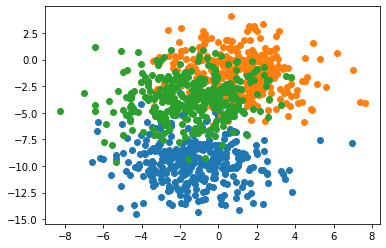

In [2]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
    # select indices of points with the class label
    row_ix = where(y == class_value)

    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show plot
pyplot.show()

Running the example creates a scatter plot of the entire dataset. We can see that the standard deviation of 2.0 means that the classes are not linearly separable (separable by a line), causing many ambiguous points. This is desirable as it means that the problem is non-trivial and will allow a neural network model to find many different good enough candidate solutions.

### Effect of Learning Rate and Momentum

In this section, we will develop a Multilayer Perceptron (MLP) model to address the blobs classification problem and investigate the effect of different learning rates and momentum.

**Learning Rate Dynamics**

The first step is to develop a function that will create the samples from the problem and split them into train and test datasets. Additionally, we must also one-hot encode the target variable to develop a model that predicts the probability of an example belonging to each class. The `prepare_data()` function below implements this behavior, returning train and test sets split into input and output elements.

In [3]:
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

    # one hot encode output variable
    y = to_categorical(y)

    # split into train and test
    n_train = 500
    
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    
    return trainX, trainy, testX, testy

Next, we can develop a function to fit and evaluate an MLP model. First, we will define a simple MLP model that expects two input variables from the blobs problem, has a single hidden layer with 50 nodes, and an output layer with three nodes to predict the probability for each of the three classes. Nodes in the hidden layer will use the rectified linear activation function, whereas nodes in the output layer will use the softmax activation function.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

We will use the stochastic gradient descent optimizer and require that the learning rate be specified so that we can evaluate different rates. The model will be trained to minimize cross-entropy.

In [8]:
# compile model
lrate=0.01
opt = SGD(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

The model will fit 200 training epochs, found with a little trial and error, and the test set will be used as the validation dataset so we can get an idea of the model's generalization error during training.

In [10]:
trainX, trainy, testX, testy = prepare_data()
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

Once fit, we will plot the model's accuracy on the train and test sets over the training epochs.

Text(0.5, 1.0, 'lrate=0.01')

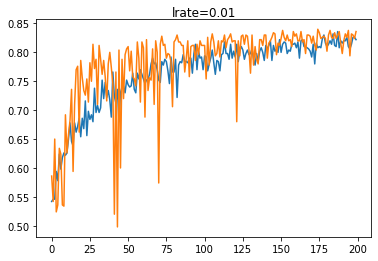

In [11]:
from matplotlib import pyplot

# plot learning curves
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.title('lrate='+str(lrate), pad=-50)

The `fit_model()` function below ties together these elements and will fit a model and plot its performance given the train and test datasets and a specific learning rate to evaluate.

In [14]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('lrate='+str(lrate), pad=-50)

We can now investigate the dynamics of different learning rates on the train and test the model's accuracy. In this example, we will evaluate learning rates on a logarithmic scale from 1E-0 (1.0) to 1E-7 and create line plots for each learning rate by calling the `fit_model()` function.

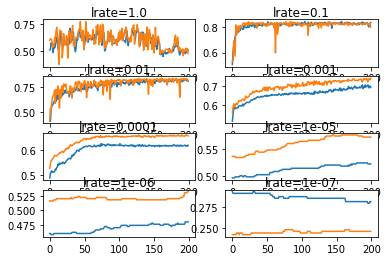

In [15]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)

    # fit model and plot learning curves for a learning rate
    fit_model(trainX, trainy, testX, testy, learning_rates[i])

# show learning curves
pyplot.show()

Tying all of this together, the complete example is listed below.

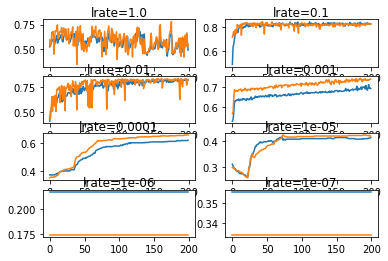

In [17]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    
    # one hot encode output variable
    y = to_categorical(y)
    
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    
    return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('lrate='+str(lrate), pad=-50)
    
# prepare dataset
trainX, trainy, testX, testy = prepare_data()

# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)

    # fit model and plot learning curves for a learning rate
    fit_model(trainX, trainy, testX, testy, learning_rates[i])

# show learning curves
pyplot.show()

Running the example creates a single figure that contains eight-line plots for the eight different evaluated learning rates. Classification accuracy on the training dataset is marked in blue, whereas accuracy on the test dataset is marked in orange.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

The plots show oscillations in behavior for the too-large learning rate of 1.0 and the inability of the model to learn anything with the too-small learning rates of 1E-6 and 1E-7. We can see that the model was able to learn the problem well with the learning rates 1E-1, 1E-2, and 1E-3, although successively slower as the learning rate was decreased. With the chosen model configuration, the results suggest a moderate learning rate of 0.1 results in good model performance on the train and test sets.

**Momentum Dynamics**

Momentum can smooth the progress of the learning algorithm that, in turn, can accelerate the training process. We can adapt the example from the previous section to evaluate the effect of momentum with a fixed learning rate. In this case, we will choose the learning rate of 0.01 that in the previous section converged to a reasonable solution but required more epochs than the learning rate of 0.1. The `fit_model()` function can be updated to take a momentum argument instead of a learning rate argument that can be used in the configuration of the SGD class and reported on the resulting plot. The updated version of this function is listed below.

In [18]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, momentum):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('momentum='+str(momentum), pad=-80)

It is common to use momentum values close to 1.0, such as 0.9 and 0.99. In this example, we will demonstrate the dynamics of the model without momentum compared to the model with momentum values of 0.5 and higher momentum values.

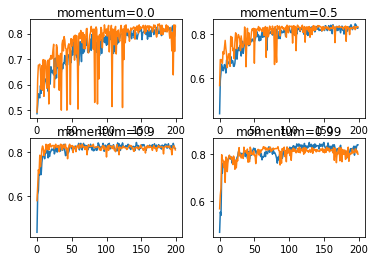

In [19]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit model and plot learning curves for a momentum
    fit_model(trainX, trainy, testX, testy, momentums[i])

# show learning curves
pyplot.show()

Tying all of this together, the complete example is listed below.

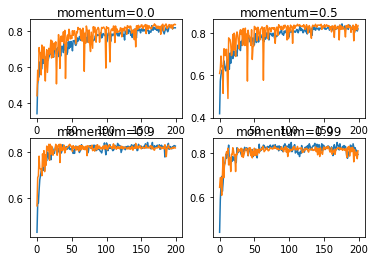

In [20]:
# study of momentum on accuracy for blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    
    # one hot encode output variable
    y = to_categorical(y)

    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    
    return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, momentum):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))

    # compile model
    opt = SGD(lr=0.01, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('momentum='+str(momentum), pad=-80)
    
# prepare dataset
trainX, trainy, testX, testy = prepare_data()

# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit model and plot learning curves for a momentum
    fit_model(trainX, trainy, testX, testy, momentums[i])
    
# show learning curves
pyplot.show()

Running the example creates a single figure that contains four-line plots for the different evaluated momentum values. Classification accuracy on the training dataset is marked in blue, whereas accuracy on the test dataset is marked in orange.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

We can see that the addition of momentum does accelerate the training of the model. Specifically, momentum values of 0.9 and 0.99 achieve reasonable train and test accuracy within about 50 training epochs instead of 200 training epochs when momentum is not used. In all cases where momentum is used, the model's accuracy on the holdout test dataset appears to be more stable, showing less volatility over the training epochs.

### Effect of Learning Rate Schedules

We will look at two learning rate schedules in this section. The first is the decay built into the SGD class, and the second is the `ReduceLROnPlateau` callback.

**Learning Rate Decay**

The SGD class provides the decay argument that specifies the learning rate decay. It may not be clear from the equation or the code as to the effect that this decay has on the learning rate over updates. We can make this clearer with a worked example. The function below implements the learning rate decay as implemented in the SGD class.

In [21]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
    return initial_lrate * (1.0 / (1.0 + decay * iteration))

We can use this function to calculate the learning rate over multiple updates with different decay values. We will compare a range of decay values [1E-1, 1E-2, 1E-3, 1E-4] with an initial learning rate of 0.01 and 200 weight updates.

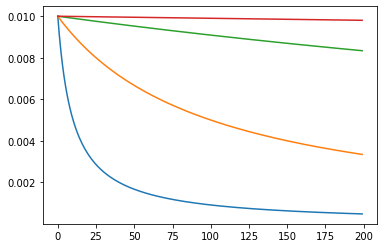

In [22]:
decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200

for decay in decays:
    # calculate learning rates for updates
    lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
    
    # plot result
    pyplot.plot(lrates, label=str(decay))

Running the example creates a line plot showing learning rates over updates for different decay values. We can see that in all cases, the learning rate starts at the initial value of 0.01. We can see that a small decay value of 1E-4 (red) has almost no effect, whereas a large decay value of 1E-1 (blue) has a dramatic effect, reducing the learning rate to below 0.002 within 50 epochs (about one order of magnitude less than the initial value) and arriving at the final value of about 0.0004 (about two orders of magnitude less than the initial value).

We can see that the change to the learning rate is not linear. We can also see that changes to the learning rate are dependent on the batch size, after which an update is performed. In the example from the previous section, a default batch size of 32 across 500 examples results in 16 updates per epoch and 3,200 updates across the 200 epochs. Using a decay of 0.1 and an initial learning rate of 0.01, we can calculate the final learning rate to be a tiny value of about 3.1E-05.

We can update the example from the previous section to evaluate the dynamics of different learning rate decay values. Fixing the learning rate at 0.01 and not using momentum, we would expect that a very small learning rate decay would be preferred, as a large learning rate decay would rapidly result in a learning rate that is too small for the model to learn effectively. The `fit_model()` function can be updated to take a decay argument that can be used to configure decay for the SGD class. The updated version of the function is listed below.

In [23]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, decay):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('decay='+str(decay), pad=-80)

We can evaluate the same four decay values of [1E-1, 1E-2, 1E-3, 1E-4] and their effect on model accuracy. The complete example is listed below.

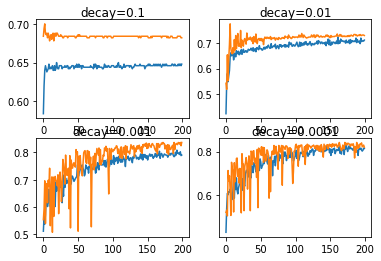

In [24]:
# study of decay rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    
    # one hot encode output variable
    y = to_categorical(y)
    
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    
    return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, decay):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('decay='+str(decay), pad=-80)
    
# prepare dataset
trainX, trainy, testX, testy = prepare_data()

# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
for i in range(len(decay_rates)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)

    # fit model and plot learning curves for a decay rate
    fit_model(trainX, trainy, testX, testy, decay_rates[i])

# show learning curves
pyplot.show()

Running the example creates a single figure that contains four line plots for the different evaluated learning rate decay values. Classification accuracy on the training dataset is marked in blue, whereas accuracy on the test dataset is marked in orange.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

We can see that the large decay values of 1E-1 and 1E-2 indeed decay the learning rate too rapidly for this model on this problem and result in poor performance. The smaller decay values result in better performance, with the value of 1E-4 perhaps causing a similar result as not using decay. We can calculate the final learning rate with a decay of 1E-4 to be about 0.0075, only a little bit smaller than the initial value of 0.01.

**Drop Learning Rate on Plateau**

The ReduceLROnPlateau will drop the learning rate by a factor after no change in a monitored metric for a given number of epochs. We can explore the effect of different patience values, which is the number of epochs to wait for a change before dropping the learning rate. We will use the default learning rate of 0.01 and drop the learning rate by order of magnitude by setting the factor argument to 0.1.

In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_delta=1E-7)

It will be interesting to review the effect on the learning rate over the training epochs. We can do that by creating a new Keras Callback that is responsible for recording the learning rate at the end of each training epoch. We can then retrieve the recorded learning rates and create a line plot to see how the learning rate was affected by drops. We can create a custom Callback called `LearningRateMonitor`. The `on_train_begin()` function is called at the start of training, and in it, we can define an empty list of learning rates. The `on_epoch_end()` function is called at the end of each training epoch, and in it, we can retrieve the optimizer and the current learning rate from the optimizer and store it in the list. The complete `LearningRateMonitor` callback is listed below.

In [33]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend

# monitor the learning rate
class LearningRateMonitor(Callback):
    # start of training
    def on_train_begin(self, logs={}):
        self.lrates = list()

    # end of each training epoch
    def on_epoch_end(self, epoch, logs={}):
        # get and store the learning rate
        optimizer = self.model.optimizer
        lrate = float(backend.get_value(optimizer.lr))
        self.lrates.append(lrate)

The `fit_model()` function developed in the previous sections can be updated to create and configure the `ReduceLROnPlateau` callback and our new `LearningRateMonitor` callback and register them with the model in the call to fit. The function will also take patience as an argument so that we can evaluate different values.

In [34]:
# fit model
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_delta=1E-7)
lrm = LearningRateMonitor()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, callbacks=[rlrp, lrm])

We will want to create a few plots in this example, so instead of creating subplots directly, the `fit_model()` function will return the list of learning rates as well as loss and accuracy on the training dataset for each training epochs. The function with these updates is listed below.

In [35]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, patience):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience, min_delta=1E-7)
    lrm = LearningRateMonitor()
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200,
    verbose=0, callbacks=[rlrp, lrm])
    
    return lrm.lrates, history.history['loss'], history.history['accuracy']

The patience in the `ReduceLROnPlateau` controls how often the learning rate will be dropped. We will test a few different patience values suited for this model on the blobs problem and keep track of the learning rate, loss, and accuracy series from each run.

In [36]:
# create learning curves for different patiences
patiences = [2, 5, 10, 15]
lr_list, loss_list, acc_list, = list(), list(), list()

for i in range(len(patiences)):
    # fit model and plot learning curves for a patience
    lr, loss, acc = fit_model(trainX, trainy, testX, testy, patiences[i])
    lr_list.append(lr)
    loss_list.append(loss)
    acc_list.append(acc)

At the end of the run, we will create figures with line plots for each of the patience values for the learning rates, training loss, and training accuracy for each patience value. We can create a helper function to easily create a figure with subplots for each series recorded.

In [37]:
# create line plots for a series
def line_plots(patiences, series):
    for i in range(len(patiences)):
        pyplot.subplot(220 + (i+1))
        pyplot.plot(series[i])
        pyplot.title('patience='+str(patiences[i]), pad=-80)
    
    pyplot.show()

Tying these elements together, the complete example is listed below.

In [40]:
# study of patience for the learning rate drop schedule on the blobs problem
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau
from tensorflow.keras import backend
from matplotlib import pyplot

# monitor the learning rate
class LearningRateMonitor(Callback):
    # start of training
    def on_train_begin(self, logs={}):
        self.lrates = list()
    
    # end of each training epoch
    def on_epoch_end(self, epoch, logs={}):
        # get and store the learning rate
        optimizer = self.model.optimizer
        lrate = float(backend.get_value(optimizer.lr))
        self.lrates.append(lrate)
        
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    
    # one hot encode output variable
    y = to_categorical(y)

    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    
    return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, patience):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # fit model
    rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience, min_delta=1E-7)
    lrm = LearningRateMonitor()
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, callbacks=[rlrp, lrm])
    
    return lrm.lrates, history.history['loss'], history.history['accuracy']

# create line plots for a series
def line_plots(patiences, series):
    for i in range(len(patiences)):
        pyplot.subplot(220 + (i+1))
        pyplot.plot(series[i])
        pyplot.title('patience='+str(patiences[i]), pad=-80)
    
    pyplot.show()
    
# prepare dataset
trainX, trainy, testX, testy = prepare_data()

# create learning curves for different patiences
patiences = [2, 5, 10, 15]
lr_list, loss_list, acc_list, = list(), list(), list()

for i in range(len(patiences)):
    # fit model and plot learning curves for a patience
    lr, loss, acc = fit_model(trainX, trainy, testX, testy, patiences[i])
    lr_list.append(lr)
    loss_list.append(loss)
    acc_list.append(acc)

Running the example creates three figures, each containing a line plot for the different patience values.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

The first figure shows line plots of the learning rate over the training epochs for each of the evaluated patience values. We can see that the smallest patience value of two rapidly drops the learning rate to a minimum value within 25 epochs, the largest patience of 15 only suffers one drop in the learning rate. From these plots, we would expect the patience values of 5 and 10 for this model on this problem to result in better performance as they allow the larger learning rate to be used for some time before dropping the rate to refine the weights.

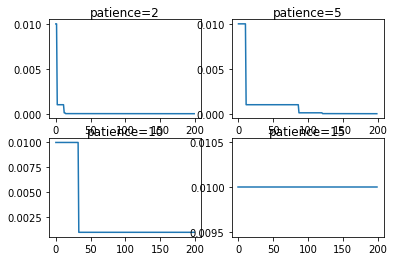

In [41]:
# plot learning rates
line_plots(patiences, lr_list)

The next figure shows the loss on the training dataset for each of the patience values. The plot shows that the patience values of 2 and 5 result in a rapid convergence of the model, perhaps to a sub-optimal loss value. In the case of a patience level of 10 and 15, the loss drops reasonably until the learning rate is dropped below a level that large changes to the loss can be seen. This occurs halfway for the patience of 10 and nearly the end of the run for patience 15.

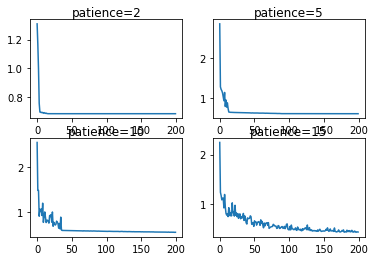

In [42]:
# plot loss
line_plots(patiences, loss_list)

The final figure shows the training set accuracy over training epochs for each patience value. We can see that the small patience values of 2 and 5 epochs result in premature convergence of the model to a less-than-optimal model at around 65% and less than 75% accuracy, respectively. The larger patience values result in better performing models, with the patience of 10 showing convergence just before 150 epochs, whereas the patience 15 continues to show the effect of a volatile accuracy given the nearly completely unchanged learning rate.
These plots show how a learning rate that is decreased in a sensible way for the problem and chosen model configuration can result in a skillful and converged stable set of final weights, a desirable property in a final model at the end of a training run.

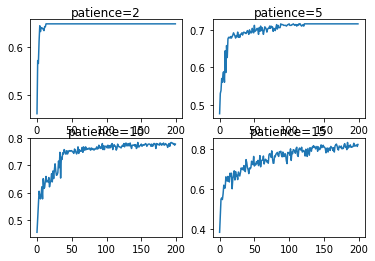

In [43]:
# plot accuracy
line_plots(patiences, acc_list)

### Effect of Adaptive Learning Rates

Learning rates and learning rate schedules are both challenging to configure and critical to the performance of a deep learning neural network model. Keras provides a number of different popular variations of stochastic gradient descent with adaptive learning rates, such as:
* Adaptive Gradient Algorithm (AdaGrad).
* Root Mean Square Propagation (RMSprop).
* Adaptive Moment Estimation (Adam).

Each provides a different methodology for adapting learning rates for each weight in the network. There is no single best algorithm, and the results of racing optimization algorithms (comparing the performance of many methods) on one problem are unlikely to be transferable to new problems. We can study the dynamics of different adaptive learning rate methods on the blobs problem. The `fit_model()` function can be updated to take the name of an optimization algorithm to evaluate, which can be specified to the optimizer argument when the MLP model is compiled. The default parameters for each method will then be used. The updated version of the function is listed below.

In [44]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('opt='+optimizer, pad=-80)

We can explore the three popular methods of `RMSprop`, `AdaGrad`, and `Adam` and compare their behavior to simple stochastic gradient descent with a static learning rate. We would expect the adaptive learning rate versions of the algorithm to perform similarly or better, perhaps adapting to the problem in fewer training epochs, but importantly, to result in a more stable model.

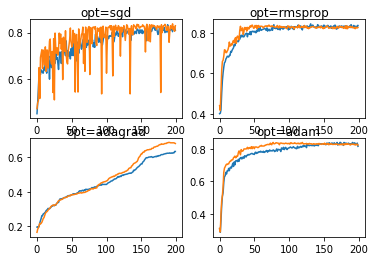

In [45]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()

# create learning curves for different optimizers
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']

for i in range(len(optimizers)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit model and plot learning curves for an optimizer
    fit_model(trainX, trainy, testX, testy, optimizers[i])

# show learning curves
pyplot.show()

Running the example creates a single figure that contains four line plots for the different evaluated optimization algorithms. Classification accuracy on the training dataset is marked in blue, whereas accuracy on the test dataset is marked in orange.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

Again, we can see that SGD with a default learning rate of 0.01 and no momentum does learn the problem but requires nearly all 200 epochs and results in volatile accuracy on the training data and much more on the test dataset. The plots show that all three adaptive learning rate methods learning the problem faster and with dramatically less volatility in train and test set accuracy.

Both `RMSProp` and `Adam` demonstrate similar performance, effectively learning the problem within 50 training epochs and spending the remaining training time making minor weight updates, but not converging as we saw with the learning rate schedules in the previous section.

**Extensions**

This section lists some ideas for extending the tutorial that you may wish to explore.
* Tune Learning. Update the learning rate experiment to automatically vary the learning rate within a discovered best order of magnitude.
* Initial Learning Rate. Vary the initial learning for an adaptive learning rate method such as Adam and compare results.

**Summary**

In this tutorial, you discovered the learning rate hyperparameter used when training deep learning neural networks. Specifically, you learned:
* Learning rate controls how quickly or slowly a neural network model learns a problem.
* How to configure the learning rate with sensible defaults, diagnose behavior, and develop a sensitivity analysis.
* How to further improve performance with learning rate schedules, momentum, and adaptive learning rates.